# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

My Battleplan:
1. Study the data and watch out for outliers, Null and something "suspicious"
2. explain how to get rid of the weird Values
3. prepare the columns and check the data is clean
4. making calculations
5. Result



[Step1](#step1):
[Step2](#step2):
[Step3](#step3):
[Step4](#step4):
[Step5](#step5):
[Step6](#step6):
[Result](#result):


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv("/datasets/vehicles_us.csv")
print(data.isnull().sum() * 100 / len(data))
print(data.head(10))
data.info()

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda 


price: This column contains clean values, but the 1 dollar prices are  very suspicious.
model_year: This column contains 7 % NaN Values,  convert to int and drop nans
model: This column contains the name of the series model and the brand, suspicious are the different word for the same model
like: Ford F-150, Ford F150,Ford f150 super crew cab xlt 
condition: This column contains the Condition of the Car, i will make a new column with the 1-5 values for the calculations
cylinders: This column contains how many cylinders inside the engine, but its a float type and should be an integer. I should fill the NaN Values in this column with the median of the modell( mean would make no sense when its 7 :D) 
fuel — gas, diesel, etc.:  this column is fine
odometer — the vehicle's mileage when the ad was published.: This column contains NaN Values and is very important. Normaly i would drop them but in this case they are 15 % of the date would be to much. i calculate the average driven kilometer per year and multiplicate it with the age of the car and i prefer int types. 
transmission: this contains the transmission of the engine. 
paint_color: i fill the NaN's with NA
is_4wd — whether the vehicle has 4-wheel drive (Boolean type): I noticed there are only 1.0 and NaN's. My conclusion is ther Nan's are the 0.0. So i will fill them with 0 and convert them to boolean
date_posted — the date the ad was published
days_listed — from publication to removal

### Conclusion <a id='step1'></a>

Model year, cylinder, mileage, color and all-wheel drive have NAN values. Especially for four-wheel drive, half of the information is missing. Some models have different names, although it is the same model. I will group them appropriately Apparently the NAN values in the four-wheel column are “no four-wheel. ” Fill NaN in mileage with the average kilometer per year times years of the car. Color I will change to NA. Model year and cylinder I will replace with a median value of the model.

### Step 2. Data preprocessing

In [2]:
print(data.head(20))

    price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
1   25500         NaN                ford f-150       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        NaN  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   
11   8990      2012.0              honda accord  excellent      

In [3]:
print(data["model"].unique())

['bmw x5' 'ford f-150' 'hyundai sonata' 'chrysler 200' 'chrysler 300'
 'toyota camry' 'honda pilot' 'kia sorento' 'chevrolet silverado 1500'
 'honda accord' 'ram 1500' 'gmc yukon' 'jeep cherokee'
 'chevrolet traverse' 'hyundai elantra' 'chevrolet tahoe' 'toyota rav4'
 'chevrolet silverado' 'jeep wrangler' 'chevrolet malibu' 'ford fusion se'
 'chevrolet impala' 'chevrolet corvette' 'jeep liberty' 'toyota camry le'
 'nissan altima' 'subaru outback' 'toyota highlander' 'dodge charger'
 'toyota tacoma' 'chevrolet equinox' 'nissan rogue'
 'mercedes-benz benze sprinter 2500' 'honda cr-v' 'jeep grand cherokee'
 'toyota 4runner' 'ford focus' 'honda civic' 'kia soul'
 'chevrolet colorado' 'ford f150 supercrew cab xlt'
 'chevrolet camaro lt coupe 2d' 'chevrolet cruze' 'ford mustang'
 'chevrolet silverado 3500hd' 'nissan frontier crew cab sv'
 'subaru impreza' 'jeep grand cherokee laredo' 'nissan versa'
 'ford f-250 sd' 'chevrolet silverado 1500 crew' 'ford f250 super duty'
 'chevrolet camaro' 'f

I noticed that some models represent the same car. That might affect the analysis too much, which is why I decided to combine them. For example, Ford F-150 and Ford F150.

In [4]:
def GroupModel(row):
    model = row['model']
    if model == 'ford f-150' or model == ' ford f150' or model == ' ford f150 supercrew cab xlt':
        row['model'] = 'ford f150'
        return row
    elif model == 'toyota camry' or model == 'toyota camry le':
        row['model'] = 'toyota camry'
        return row
    elif model == 'chevrolet silverado 1500' or model == 'chevrolet silverado'  or model == 'chevrolet silverado 1500 crew':
        row['model'] = 'chevrolet silverado'
        return row
    elif model == 'jeep grand cherokee' or model == 'jeep grand cherokee laredo':
        row['model'] = 'jeep cherokee'
        return row
    elif model == 'chevrolet camaro lt coupe 2d' or model == 'chevrolet camaro':
        row['model'] = 'chevrolet camaro'
        return row
    elif model == 'nissan frontier crew cab sv' or model == 'nissan frontier':
        row['model'] = 'nissan frontier'
        return row
    elif model == 'ford f350 super duty' or model == 'ford f-350 sd' or model == ' ford f-350':
        row['model'] = 'ford f350'
        return row
    elif model == 'ford f250' or model == 'ford f-250 sd' or model == 'ford f250 super duty' or model == 'ford f-250 super duty':
        row['model'] = 'ford f250'
        return row
    elif model == 'gmc sierra' or model == 'gmc sierra 1500':
        row['model'] = 'gmc sierra'
        return row
    elif model == 'honda civic' or model == 'honda civic lx':
        row['model'] = 'honda civic'
        return row
    elif model == 'ford fusion' or model == 'ford fusion le':
        row['model'] = 'ford fusion'
        return row
    else:
        return row
data = data.apply(GroupModel, axis=1)

In [5]:
data["model"].unique()

array(['bmw x5', 'ford f150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado', 'honda accord', 'ram 1500', 'gmc yukon',
       'jeep cherokee', 'chevrolet traverse', 'hyundai elantra',
       'chevrolet tahoe', 'toyota rav4', 'jeep wrangler',
       'chevrolet malibu', 'ford fusion se', 'chevrolet impala',
       'chevrolet corvette', 'jeep liberty', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'toyota 4runner', 'ford focus', 'honda civic', 'kia soul',
       'chevrolet colorado', 'ford f150 supercrew cab xlt',
       'chevrolet camaro', 'chevrolet cruze', 'ford mustang',
       'chevrolet silverado 3500hd', 'nissan frontier', 'subaru impreza',
       'nissan versa', 'ford f250', 'ford mustang gt coupe 2d',
       'subaru forester', 'ford explor

Now the models are combined.

In [6]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [7]:
data.dropna(subset = ['model_year'],inplace = True)# i drop the nan's because 
                                                  #the mean or median of the models can not fit with the dates.

data['date_posted']= pd.to_datetime(data['date_posted'], format='%Y-%m-%d')#create date format
data['age'] = (data['date_posted'].dt.year - data['model_year'])#crate new column with age

data['model_year'] = data['model_year'].astype('int')#change type to int
data['cylinders'] = data.groupby('model')['cylinders'].apply(lambda x: x.fillna(x.median())) #fill cylinder nan's
data['odometer'] = data.groupby(['model', "age"])['odometer'].apply(lambda x: x.fillna(x.median()))#fill odometer nan's


data['paint_color'] = data['paint_color'].fillna("NA")#fill paint nan's
data['cylinders'] = data['cylinders'].astype('int')#change cylinders to int type

data['is_4wd'] = data['is_4wd'].fillna(0)#fill 4wd nan's to 0 to change them easier to boolean

data['is_4wd'] = data['is_4wd'].astype('bool')# change to bolean

data['odometer'] = data['odometer'].fillna(24854 * data['age'])# fill na with the mean for the 0 years old card who creates inf 
#values
data['odometer'] = data['odometer'].astype('int')#change odometer to int

print(data.isnull().sum() * 100 / len(data))#check everything worked fine
print(data.head())
data.info()






/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


price           0.0
model_year      0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
transmission    0.0
type            0.0
paint_color     0.0
is_4wd          0.0
date_posted     0.0
days_listed     0.0
age             0.0
dtype: float64
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003       ford f150       fair          8  gas    161450   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    chrysler 300  excellent          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed   age  
0    automatic     SUV          NA    True  2018-06-23           19   7.0  
2    automatic   sedan         red   False  2019-02-07           79   6.0  
3    automatic

In [8]:
print(data.query('model == "mercedes-benz benze sprinter 2500" '))

       price  model_year                              model  condition  \
42     34900        2013  mercedes-benz benze sprinter 2500  excellent   
1642   34900        2013  mercedes-benz benze sprinter 2500  excellent   
2232   34900        2013  mercedes-benz benze sprinter 2500  excellent   
2731   34900        2013  mercedes-benz benze sprinter 2500  excellent   
4681   34900        2013  mercedes-benz benze sprinter 2500  excellent   
5681   34900        2013  mercedes-benz benze sprinter 2500  excellent   
8975   34900        2013  mercedes-benz benze sprinter 2500  excellent   
10600  34900        2013  mercedes-benz benze sprinter 2500  excellent   
11916  34900        2013  mercedes-benz benze sprinter 2500  excellent   
14796  34900        2013  mercedes-benz benze sprinter 2500  excellent   
14871  34900        2013  mercedes-benz benze sprinter 2500  excellent   
17473  34900        2013  mercedes-benz benze sprinter 2500  excellent   
17493  34900        2013  mercedes-ben

I noticed that at "mercedes-benz use sprinter 2500" the cars had no mileage and all are from 2013 and seem to be the same age also most have the color black and all are offered at the same price. I assume this is a fleet of a company which was sold and therefore shows many identical values.

Conclusion <a id='step2'></a>

I did not find it possible to fill up the model year reliably, since this value is critical for the analysis and I do not want to influence it if several rows have the same year and therefore the same age (7%). After that I changed the type to int because it is more suitable. The cylinders and the mileage I have filled with the averages, since an average weirde values could generate e. g. 7 cylinders which do not exist. I filled the missing colors with “NA” because I couldn’t find them reliably. After that I changed the cylinders to the appropriate int type. After that I changed the nan’s in the column Allwheel to 0 and then to boolean. For the column date_postet I first applied the date format and then created the column alter. Cars with 0 years have made inf values in the odometer column why I have refilled them with the average mileage. Finally I checked if all missing values are filled and the column type has the correct format.

### Step 3. Make calculations and add them to the table

In [9]:
data["ad_day"] = data['date_posted'].dt.weekday # create column ad_day
data["ad_month"] = data['date_posted'].dt.month# create column ad_month
data["ad_year"] = data['date_posted'].dt.year#creat column ad_year
data["average_mileage_per_year"] =  data["odometer"] / data["age"]# create column average_mileage_per_year

data = data.replace([np.inf, -np.inf], np.nan)#take care about the inf values
data['average_mileage_per_year'] = data.groupby('model')['odometer'].apply(lambda x: x.fillna(x.median()))# fill the inf values with median


data["average_mileage_per_year"] = data["average_mileage_per_year"].astype('int')#change type to int
print(data.isnull().sum() * 100 / len(data))
print(data.head(5))



price                       0.0
model_year                  0.0
model                       0.0
condition                   0.0
cylinders                   0.0
fuel                        0.0
odometer                    0.0
transmission                0.0
type                        0.0
paint_color                 0.0
is_4wd                      0.0
date_posted                 0.0
days_listed                 0.0
age                         0.0
ad_day                      0.0
ad_month                    0.0
ad_year                     0.0
average_mileage_per_year    0.0
dtype: float64
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003       ford f150       fair          8  gas    161450   
4  14900        2017    chrysler 200  excellent          4  gas     80903   
5  14990        2014    

In [10]:
def GetCondition(row):
    condi = row["condition"]
    if condi == "new":
        row["condition"] = 5
        return row
    elif condi == "like new":
        row["condition"] = 4
        return row
    elif condi == "excellent":
        row["condition"] = 3
        return row
    elif condi == "good":
        row["condition"] = 2
        return row
    elif condi == "fair":
        row["condition"] = 1
        return row
    elif condi == "salvage":
        row["condition"] = 0
        return row
    
data = data.apply(GetCondition, axis=1)
print(data.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
2   5500        2013  hyundai sonata          4          4  gas    110000   
3   1500        2003       ford f150          1          8  gas    161450   
4  14900        2017    chrysler 200          3          4  gas     80903   
5  14990        2014    chrysler 300          3          6  gas     57954   

  transmission    type paint_color  is_4wd date_posted  days_listed   age  \
0    automatic     SUV          NA    True  2018-06-23           19   7.0   
2    automatic   sedan         red   False  2019-02-07           79   6.0   
3    automatic  pickup          NA   False  2019-03-22            9  16.0   
4    automatic   sedan       black   False  2019-04-02           28   2.0   
5    automatic   sedan       black    True  2018-06-20           15   4.0   

   ad_day  ad_month  ad_year  average_mileage_per_year  
0       5        

Conclusion Step 3 <a id='step3'></a>

To match the task, I created the columns ad_day, ad_month, ad_year and average_mileage_per_year. I had to take care of the inf values again and change the type to int. After that I assigned the state of the cars to the values 1 to 5 according to the task.

### Step 4. Carry out exploratory data analysis

1. Study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. Plot histograms for each of these parameters. Study how outliers affect the form and readability of the histograms.

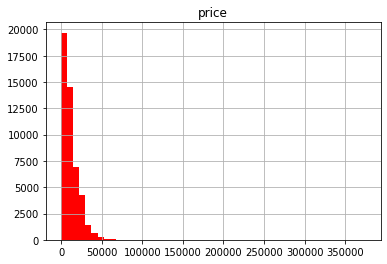

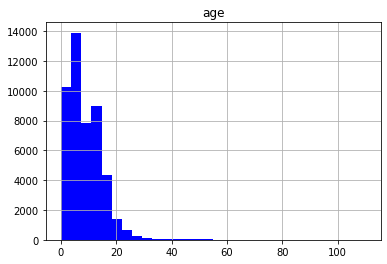

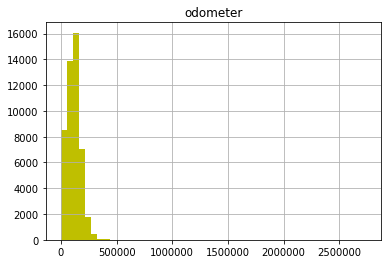

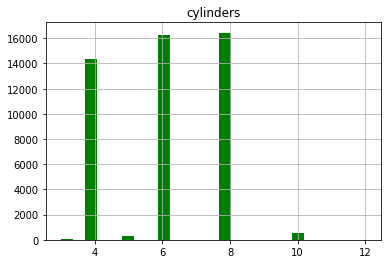

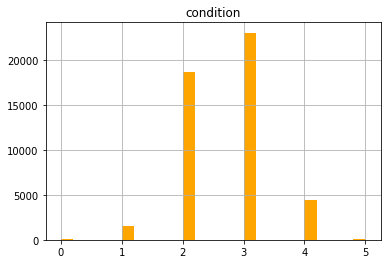

In [11]:
data.hist('price', bins=50, color="r")
data.hist('age', bins=30, color="b")
data.hist('odometer', bins=50, color="y")
data.hist('cylinders', bins=25, color="g")
data.hist('condition', bins=25, color="orange")
plt.show()

I can see that there are some outliers that change the graphics.

2. Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data.

In [12]:


column= ["price", "ad_day", "cylinders", "condition", "average_mileage_per_year", "age" ]#get the columns
def upper_outlier(column):#create a function for the quartiles and the upper outlier
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_outlier = Q3 + 1.5 * IQR
    return upper_outlier
upper_outlier = upper_outlier(column)
print(upper_outlier)#print the calculatet outlier

def lower_outlier(column): # same for the lower outlier
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_outlier = Q3 - 1.5 * IQR
    return lower_outlier
lower_outlier = lower_outlier(column)
print(lower_outlier)#print the calculatet outlier






price                        34750.000
ad_day                          11.000
cylinders                       14.000
condition                        4.500
average_mileage_per_year    274576.125
age                             24.000
dtype: float64
price                        -950.000
ad_day                         -1.000
cylinders                       2.000
condition                       1.500
average_mileage_per_year    31423.875
age                             0.000
dtype: float64


I have noticed that some results are meaningless e. g. 14 cylinders and the age is older than 24, just like the -950 price and the old, I’m going to replace this manually

In [13]:



cleandata = data.query('price > 100 and price  < 34750 and age  < 60 and condition >= 2 and condition <= 4 and average_mileage_per_year <= 255053.5')


print(cleandata.head(5))

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
2   5500        2013  hyundai sonata          4          4  gas    110000   
4  14900        2017    chrysler 200          3          4  gas     80903   
5  14990        2014    chrysler 300          3          6  gas     57954   
6  12990        2015    toyota camry          3          4  gas     79212   

  transmission   type paint_color  is_4wd date_posted  days_listed  age  \
0    automatic    SUV          NA    True  2018-06-23           19  7.0   
2    automatic  sedan         red   False  2019-02-07           79  6.0   
4    automatic  sedan       black   False  2019-04-02           28  2.0   
5    automatic  sedan       black    True  2018-06-20           15  4.0   
6    automatic  sedan       white   False  2018-12-27           73  3.0   

   ad_day  ad_month  ad_year  average_mileage_per_year  
0       5         6     2018 

now i have clean data (:

## 3. Use the filtered data to plot 3. new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram.

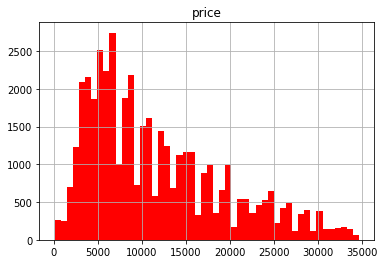

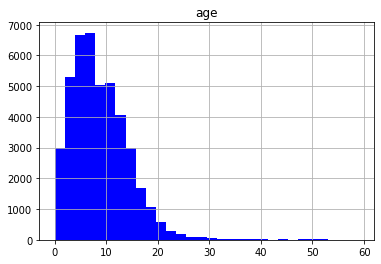

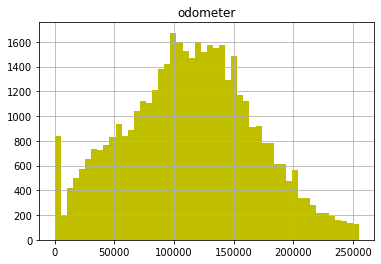

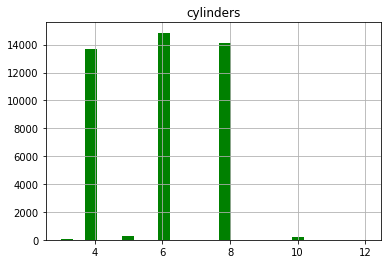

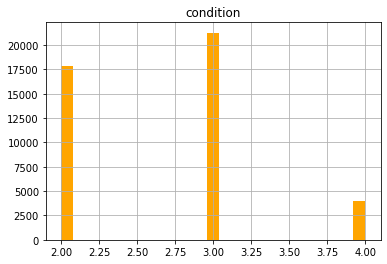

In [14]:
cleandata.hist('price', bins=50, color="r")
cleandata.hist('age', bins=30, color="b")
cleandata.hist('odometer', bins=50, color="y")
cleandata.hist('cylinders', bins=25, color="g")
cleandata.hist('condition', bins=25, color="orange")
plt.show()

In [15]:
print(cleandata.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas    145000   
2   5500        2013  hyundai sonata          4          4  gas    110000   
4  14900        2017    chrysler 200          3          4  gas     80903   
5  14990        2014    chrysler 300          3          6  gas     57954   
6  12990        2015    toyota camry          3          4  gas     79212   

  transmission   type paint_color  is_4wd date_posted  days_listed  age  \
0    automatic    SUV          NA    True  2018-06-23           19  7.0   
2    automatic  sedan         red   False  2019-02-07           79  6.0   
4    automatic  sedan       black   False  2019-04-02           28  2.0   
5    automatic  sedan       black    True  2018-06-20           15  4.0   
6    automatic  sedan       white   False  2018-12-27           73  3.0   

   ad_day  ad_month  ad_year  average_mileage_per_year  
0       5         6     2018 

without the outliers the histogram looks better and is easier to understand

## 4. Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

33.0  is a typical lifetime of an ad
                                  days_listed                 
                                          sum count       mean
model                                                         
acura tl                                 8863   224  39.566964
bmw x5                                  10427   246  42.386179
buick enclave                           10075   257  39.202335
cadillac escalade                       12228   295  41.450847
chevrolet camaro                        26923   685  39.303650
chevrolet colorado                      10237   264  38.776515
chevrolet corvette                      18125   464  39.062500
chevrolet cruze                         17867   428  41.745327
chevrolet equinox                       21076   546  38.600733
chevrolet impala                        24995   636  39.300314
chevrolet malibu                        22787   571  39.907180
chevrolet silverado                    137819  3471  39.705848
chevrolet silverad

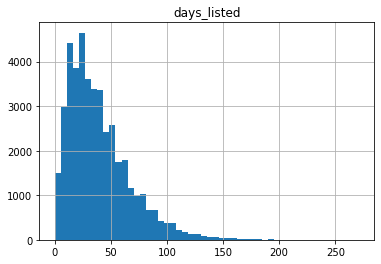

In [16]:
cleandata.hist('days_listed', bins=50)

day_median = cleandata["days_listed"].median()#calculate the median for the daylisted
day_mean = cleandata["days_listed"].mean()#calculate the mean for the daylisted
print(day_median," is a typical lifetime of an ad")#print it



pd.set_option("display.max_rows", 85, "display.max_columns", 50)
print(data.groupby('model').agg({'days_listed':['sum', 'count', 'mean']}))#print ALL models to see everything is fine




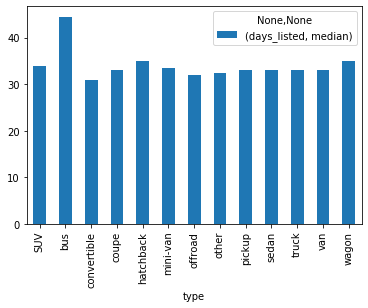

In [17]:
cleandata.groupby('type').agg({'days_listed':['median']}).plot(kind="bar")
plt.show()

## Conclusion step 4 <a id='step4'></a>

According to the graphs, the average of 33 days per ad fits, possibly the time it takes to get the cars online, be found, make an appointment, meet and make a purchase decision. i noticed the bus is a outlier.

## 5. Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

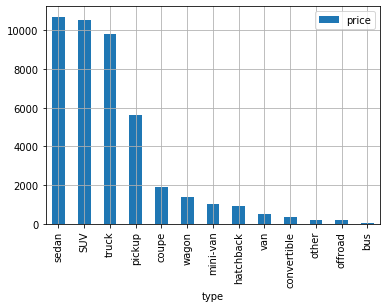

In [18]:
pivot_count_and_price_by_type = cleandata.pivot_table(index="type", values="price", aggfunc=(["count","mean"]))
pivot_count_and_price_by_type2 = pivot_count_and_price_by_type.pivot_table(index="type", values="count")

pivot_count_and_price_by_type2.sort_values(by="price", ascending =False).plot( kind="bar", grid = True)
plt.show()

Conclusion step 5 <a id='step5'></a>


With the cleandata, the SUV and Sedan are the most popular cars. (Funfact: without the removed outliers would truck and SUV would win )

## 6. What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

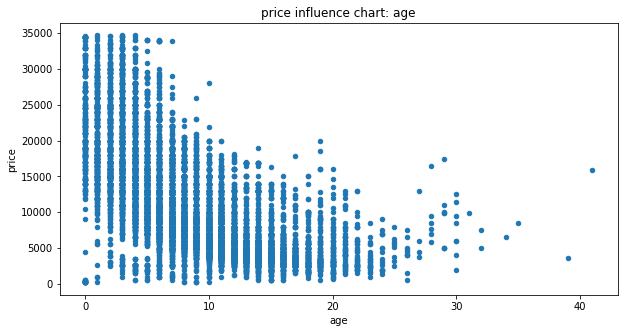

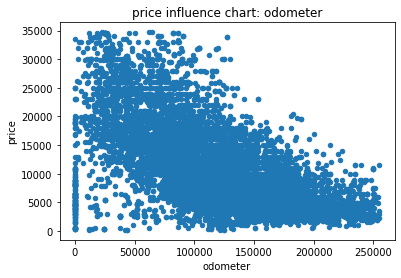

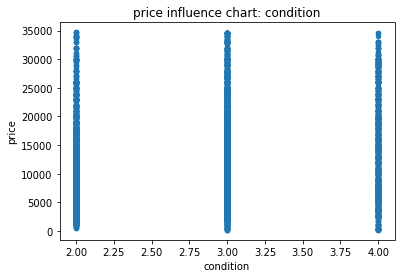

In [19]:


def GetPrice(type):#create a function to plot 3 graphs with age odometer and condition scatter for SUV and sedan
    stdata = cleandata[cleandata['type'] == type]
    
    stdata.plot(y = "price" , x = "age", kind="scatter",figsize = (10, 5))
    plt.title('price influence chart: age')
    stdata.plot(y = "price" , x = "odometer", kind="scatter")
    plt.title('price influence chart: odometer')
    stdata.plot(y = "price" , x = "condition", kind="scatter")
    plt.title('price influence chart: condition')
    plt.show()

GetPrice("SUV")


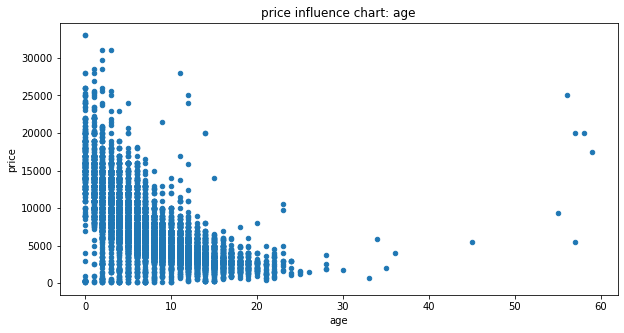

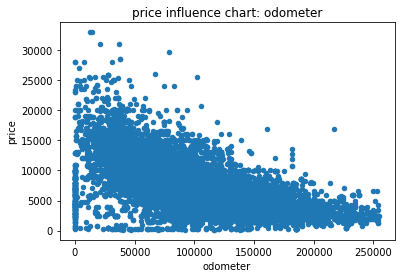

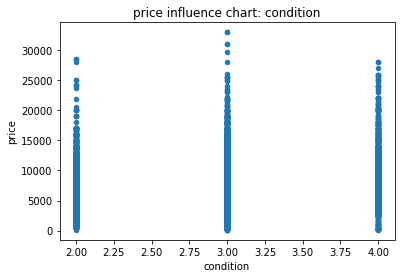

In [20]:
GetPrice("sedan")

In [21]:

corr=cleandata.corr()
corr.style.background_gradient(cmap='coolwarm')

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,age,ad_day,ad_month,ad_year,average_mileage_per_year
price,1,0.494476,0.142193,0.358366,-0.477963,0.36702,-0.004355,-0.492807,-0.00236373,-0.00719593,0.00668424,-0.477963
model_year,0.494476,1,0.194483,-0.193076,-0.484615,0.00103525,-0.00507097,-0.996852,-0.00692133,-0.0119471,0.0106645,-0.484615
condition,0.142193,0.194483,1,-0.0901692,-0.21888,-0.00148643,-0.0029496,-0.193905,0.0029227,-0.000530321,0.0016443,-0.21888
cylinders,0.358366,-0.193076,-0.0901692,1,0.145692,0.393759,0.00346997,0.192627,-0.00732644,0.000436003,-5.15351e-05,0.145692
odometer,-0.477963,-0.484615,-0.21888,0.145692,1,0.0813575,0.00645494,0.483647,2.95295e-05,0.00353574,0.0018672,1
is_4wd,0.36702,0.00103525,-0.00148643,0.393759,0.0813575,1,0.0038973,-0.00115429,0.00136537,0.00262969,-0.0015314,0.0813575
days_listed,-0.004355,-0.00507097,-0.0029496,0.00346997,0.00645494,0.0038973,1,0.00573471,0.00290449,-0.00981968,0.00851842,0.00645494
age,-0.492807,-0.996852,-0.193905,0.192627,0.483647,-0.00115429,0.00573471,1,0.00643304,-0.0529619,0.0686493,0.483647
ad_day,-0.00236373,-0.00692133,0.0029227,-0.00732644,2.95295e-05,0.00136537,0.00290449,0.00643304,1,0.00417006,-0.00595732,2.95295e-05
ad_month,-0.00719593,-0.0119471,-0.000530321,0.000436003,0.00353574,0.00262969,-0.00981968,-0.0529619,0.00417006,1,-0.818289,0.00353574


In [22]:
data.groupby('paint_color').size()#get full data color size

paint_color
NA        8615
black     7176
blue      4143
brown     1120
custom    1074
green     1278
grey      4686
orange     207
purple      95
red       4138
silver    5811
white     9324
yellow     239
dtype: int64

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


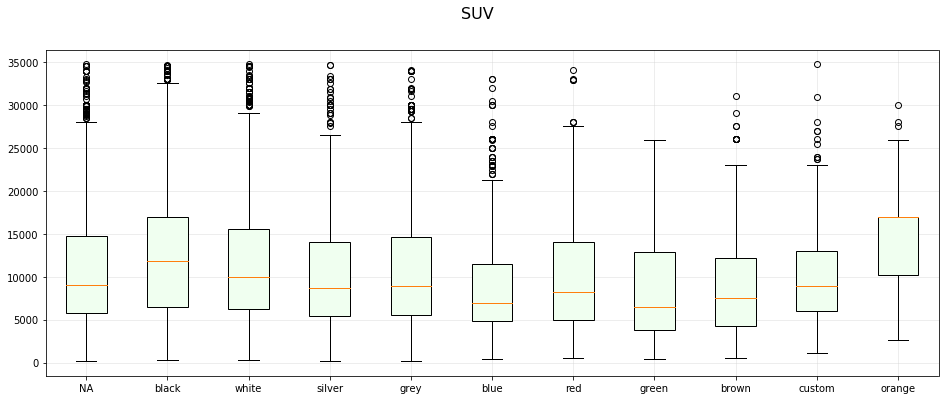

In [23]:
def boxplots(car_type):#create function to boxplot the color 

    stats = cleandata.pivot_table(
                index = ['paint_color', 'type'],
                values ='price',
                aggfunc='count').sort_values('price', ascending=False)

    good_stats = stats[stats['price'] >= 50].reset_index()
    good_stats.columns = ['paint_color', 'type', 'count']
    inserts = good_stats['paint_color'][good_stats['type'] == car_type].unique()

    plots = []

    for i in inserts:
        plots.append(cleandata['price'][(cleandata['paint_color']== i)
                                            & (cleandata['type'] == car_type)])

    plt.figure(figsize = (16,6))
    plt.boxplot(plots, labels = inserts, patch_artist=True,
            boxprops=dict(facecolor='honeydew'))
    plt.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    plt.suptitle('{}'
                 .format(car_type), fontsize=16)

    plt.show()
boxplots("SUV")

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


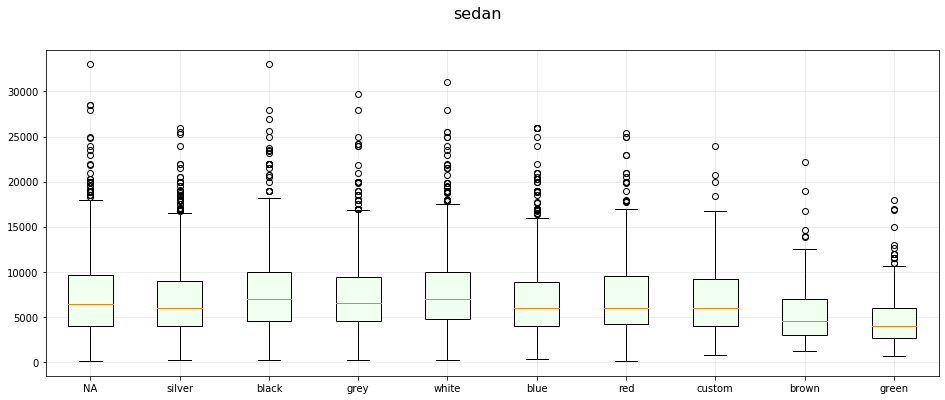

In [24]:
boxplots("sedan")

In [25]:
def boxplots2(car_type):#create function to boxplot the transmission

    stats = cleandata.pivot_table(
                index = ['transmission', 'type'],
                values ='price',
                aggfunc='count').sort_values('price', ascending=False)

    good_stats = stats[stats['price'] >= 50].reset_index()
    good_stats.columns = ['transmission', 'type', 'count']
    inserts = good_stats['transmission'][good_stats['type'] == car_type].unique()

    plots = []

    for i in inserts:
        plots.append(cleandata['price'][(cleandata['transmission']== i)
                                            & (cleandata['type'] == car_type)])

    plt.figure(figsize = (16,6))
    plt.boxplot(plots, labels = inserts, patch_artist=True,
            boxprops=dict(facecolor='honeydew'))
    plt.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    plt.suptitle('{}'
                 .format(car_type), fontsize=16)

    plt.show()

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


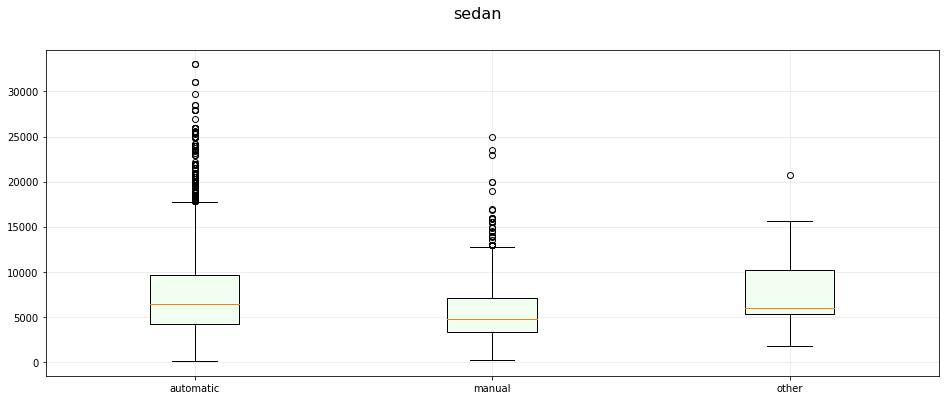

In [26]:
boxplots2("sedan")

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


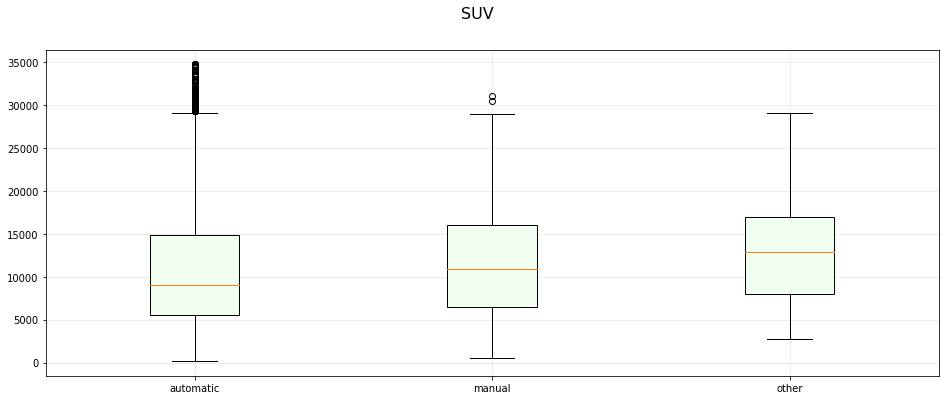

In [27]:
boxplots2("SUV")

Conclusion <a id='step6'></a>

I have printed the boxplots and scatterplots according to the task. It looks like the SUVs have a higher price tag with more miles.

## Result: <a id='result'></a>

### Step 5. Overall conclusion 

Overall can be said the SUV and Sedan the most popular vehicles are a bus very long day listed needed. White is the most popular color and it seems that some values are not mandatory fields, so missing values have to be filled in. The biggest factor to have on the price: The age, mileage, condition and vehicle type